In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [3]:
file_path = 'smoking_driking_dataset_Ver01.csv'
column_names = [ 'sex', 'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'hear_left', 'hear_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'
]

# Load the dataset with specified column names
df = pd.read_csv(file_path, header=0, names=column_names)

# Display the first few rows of the dataframe
#print(df.head())

# Drop rows with any missing values
df = df.dropna()
#len(df)



In [5]:
# Select random 100,000 records from the dataframe
sample_df = df.sample(n=100000, random_state=1)

# Save the sampled dataframe to a new CSV file
sample_file_path = 'smoking_driking_dataset_sampled.csv'
sample_df.to_csv(sample_file_path, index=False)

sample_df.head()
sample_df_no_feature_engg = sample_df.copy()

Test set accuracy: 0.6376
Best hyperparameters: {'n_neighbors': 15}


C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_24452\2626028748.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_smoke, palette='viridis')


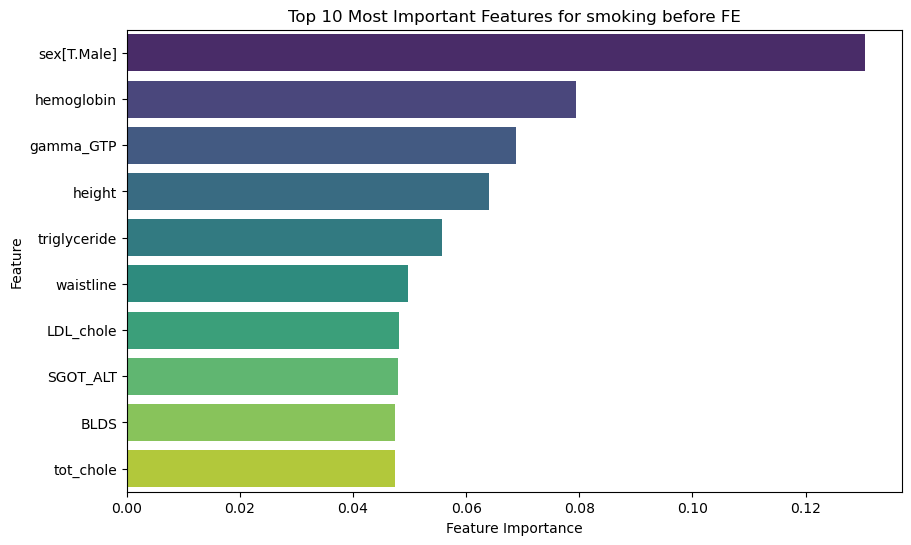

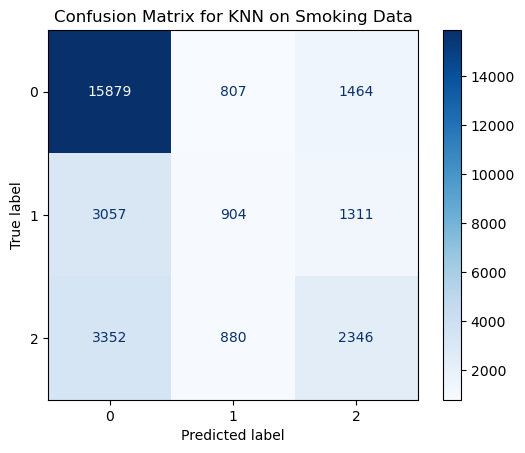

In [7]:
#SMOKING 
sample_df_no_fe_smoking = sample_df_no_feature_engg.drop('DRK_YN', axis=1)

formula = 'SMK_stat_type_cd ~ sex + age + height + weight + waistline + sight_left + sight_right + hear_left + hear_right + SBP + DBP +BLDS + tot_chole + HDL_chole + LDL_chole + triglyceride + hemoglobin + urine_protein + serum_creatinine + SGOT_AST + SGOT_ALT + gamma_GTP '
y_smoke, X_smoke = dmatrices(formula, data=sample_df_no_fe_smoking, return_type='dataframe')
# Drop the intercept column from X
X_smoke = X_smoke.drop('Intercept', axis=1)

# Scale the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_smoke_train, X_smoke_test, y_smoke_train, y_smoke_test = train_test_split(X_smoke, y_smoke, test_size=0.3, random_state=1)

# Step 5: Perform cross-validation to find the best hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_smoke_train, y_smoke_train.values.ravel())

# Step 6: Train the final model using the best hyperparameters on the entire training set
best_knn_smoke = grid_search.best_estimator_
best_knn_smoke.fit(X_smoke_train, y_smoke_train.values.ravel())

# Step 7: Evaluate the final model on the test set
test_accuracy_smoke = best_knn_smoke.score(X_smoke_test, y_smoke_test)
print(f'Test set accuracy: {test_accuracy_smoke:.4f}')

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')


# Train a Random Forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_smoke_train, y_smoke_train.values.ravel())

# Get feature importances
importance_scores_smoke = rf.feature_importances_

importance_df_smoke = pd.DataFrame({
    'Feature': X_smoke_test.columns,
    'Importance': importance_scores_smoke
})

# Select top N features for visualization
top_n = 10
top_features_smoke = importance_df_smoke.nlargest(top_n, 'Importance')

# Plotting the most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_smoke, palette='viridis')
plt.title(f'Top {top_n} Most Important Features for smoking before FE')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Predict on the test set
y_smoke_pred = best_knn_smoke.predict(X_smoke_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_smoke_test, y_smoke_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix for KNN on Smoking Data')
plt.show()



In [9]:
#DRINKING 
sample_df_no_fe_drink= sample_df_no_feature_engg.drop('SMK_stat_type_cd', axis=1)

formula_drink = 'DRK_YN ~ sex + age + height + weight + waistline + sight_left + sight_right + hear_left + hear_right + SBP + DBP + BLDS + tot_chole + HDL_chole + LDL_chole + triglyceride + hemoglobin + urine_protein + serum_creatinine + SGOT_AST + SGOT_ALT + gamma_GTP '
y_drink, X_drink = dmatrices(formula_drink, data=sample_df_no_fe_drink, return_type='dataframe')

# Drop the intercept column from X
X_drink = X_drink.drop('Intercept', axis=1)


# Step 4: Train-test split
X_drink_train, X_drink_test, y_drink_train, y_drink_test = train_test_split(X_drink, y_drink, test_size=0.3, random_state=1)

# Step 5: Perform cross-validation to find the best hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search_drink = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search_drink.fit(X_drink_train, y_drink_train)

# Step 6: Train the final model using the best hyperparameters on the entire training set
best_knn_drink = grid_search_drink.best_estimator_
best_knn_drink.fit(X_drink_train, y_drink_train)

# Step 7: Evaluate the final model on the test set
test_accuracy_drink = best_knn_drink.score(X_drink_test, y_drink_test)
print(f'Test set accuracy: {test_accuracy_drink:.4f}')

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search_drink.best_params_}')


# # Train a Random Forest model
# rf_drink = RandomForestClassifier(random_state=1)
# rf_drink.fit(X_drink_train, y_drink_train.values.ravel())


# # Get feature importances
# importance_scores_drink = rf_drink.feature_importances_

# importance_df_drink = pd.DataFrame({
#     'Feature': X_drink_test.columns,
#     'Importance': importance_scores_drink
# })

# # Select top N features for visualization
# top_n = 10
# top_features_drink = importance_df_drink.nlargest(top_n, 'Importance')

# # Plotting the most important features
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=top_features_drink, palette='viridis')
# plt.title(f'Top {top_n} Most Important Features for only drinking before FE')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.show()



Test set accuracy: 0.6844
Best hyperparameters: {'n_neighbors': 15}


In [11]:
# FEATURE ENGINEERING

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'hemoglobin',
                      'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])
print(sample_df.head())

# new column 'Hearing_State'
sample_df['Hearing_State'] = df.apply(lambda row: 2 if row['hear_left'] == 2 or row['hear_right'] == 2 else 1, axis=1)

# new column 'Sight_State'
#sample_df['Sight_State'] = df.apply(lambda row: 2 if row['sight_left'] == 2 or row['sight_right'] == 2 else 1, axis=1)

# new column 'HDL_LDL_ratio'
sample_df['HDL_LDL_Ratio'] = sample_df['HDL_chole'] / sample_df['LDL_chole']

# new column 'BMI'
sample_df['BMI'] = sample_df['weight'] / ((sample_df['height'] / 100) ** 2)

# new column 'Total_HDL_ratio'
sample_df['Total_HDL_Ratio'] = sample_df['tot_chole'] / sample_df['HDL_chole']

# new column 'Liver_Enzyme_Ratio' (SGOT:SGPT)
sample_df['Liver_Enzyme_Ratio'] = sample_df['SGOT_AST'] / sample_df['SGOT_ALT']
sample_df['liver_damage_score'] = sample_df['gamma_GTP'] + sample_df['SGOT_ALT']


#Smoked [1], Never Smoked [0]
# Categorize smoking status
sample_df['Smoking_Status'] = sample_df['SMK_stat_type_cd'].apply(lambda x: '0' if x == 1 else '1')

# Categorize drinking status
sample_df['Drinking_Status'] = sample_df['DRK_YN'].apply(lambda x: '0' if x == 'N' else '1')

sample_df['Smoking_Status'] = pd.to_numeric(sample_df['Smoking_Status'])

#Has ever been into drinking or smoking
#sample_df['DorS'] = sample_df.apply(lambda row: 1 if row['Smoking_Status'] == 1 or row['Drinking_Status'] == '1' else 0, axis=1)

#sample_df[:5]
#len(sample_df)


           sex  age  height  weight  waistline  sight_left  sight_right  \
921688  Female   50     155      60       82.0         0.7          0.5   
56603   Female   55     155      50       73.2         1.0          0.8   
434962  Female   60     160      60       78.0         0.6          0.8   
742617    Male   35     175      80       94.0         1.2          1.2   
604547    Male   45     160      60       82.1         0.9          0.8   

        hear_left  hear_right       SBP  ...  LDL_chole  triglyceride  \
921688        1.0         1.0  0.521217  ...  -0.494805         193.0   
56603         1.0         1.0 -0.508473  ...   0.523844          39.0   
434962        1.0         1.0 -1.744101  ...  -0.632460          57.0   
742617        1.0         1.0 -0.096597  ...   0.413720         258.0   
604547        1.0         1.0  0.864448  ...  -0.384681         115.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
921688   -0.145895            1.0  

Test set accuracy: 0.7467


C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_24452\1080759034.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_smoke_fe, palette='viridis')


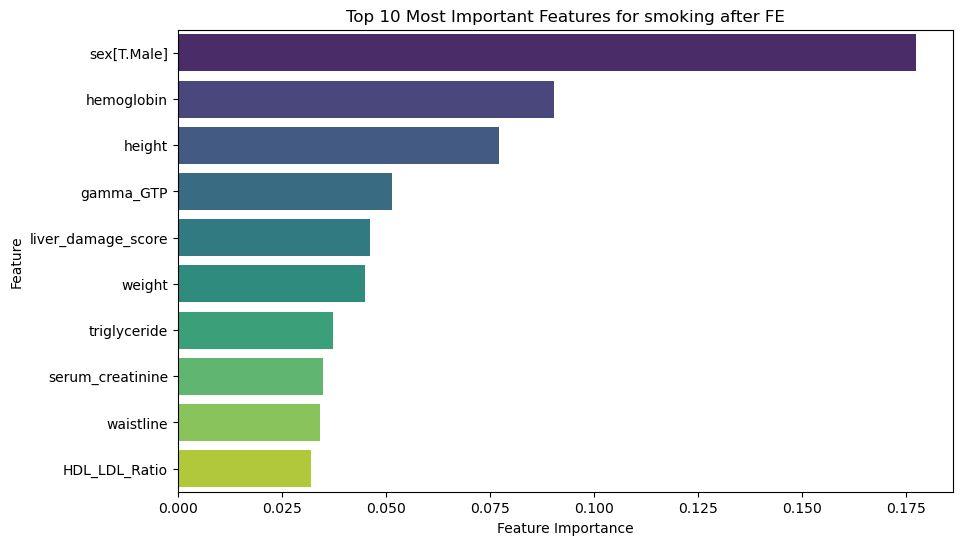

In [12]:
#SMOKING After FE 
sample_df_smoking = sample_df.drop(columns=['DRK_YN', 'SMK_stat_type_cd', 'Drinking_Status'])

formula_smoke_fe = 'Smoking_Status ~ sex + age + height + weight + waistline + sight_left + sight_right + hear_left + hear_right + SBP + DBP + BLDS + tot_chole + HDL_chole + LDL_chole + triglyceride + hemoglobin + urine_protein + serum_creatinine + SGOT_AST + SGOT_ALT +liver_damage_score+ gamma_GTP + Hearing_State + HDL_LDL_Ratio+ BMI+ Total_HDL_Ratio+ Liver_Enzyme_Ratio'
y_smoke_fe, X_smoke_fe = dmatrices(formula_smoke_fe, data=sample_df_smoking, return_type='dataframe')

# Drop the intercept column from X
X_smoke_fe = X_smoke_fe.drop('Intercept', axis=1)


# Step 4: Train-test split
X_smoke_train_fe, X_smoke_test_fe, y_smoke_train_fe, y_smoke_test_fe = train_test_split(X_smoke_fe, y_smoke_fe, test_size=0.3, random_state=1)

# Step 5: Perform cross-validation to find the best hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search_fe = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search_fe.fit(X_smoke_train_fe, y_smoke_train_fe.values.ravel())

# Step 6: Train the final model using the best hyperparameters on the entire training set
best_knn_smoke_fe = grid_search.best_estimator_
best_knn_smoke_fe.fit(X_smoke_train_fe, y_smoke_train_fe.values.ravel())

# Step 7: Evaluate the final model on the test set
test_accuracy_smoke_fe = best_knn_smoke_fe.score(X_smoke_test_fe, y_smoke_test_fe)
print(f'Test set accuracy: {test_accuracy_smoke_fe:.4f}')


# Train a Random Forest model
rf_fe = RandomForestClassifier(random_state=1)
rf_fe.fit(X_smoke_train_fe, y_smoke_train_fe.values.ravel())

# Get feature importances
importance_scores_smoke_fe = rf_fe.feature_importances_

importance_df_smoke_fe = pd.DataFrame({
    'Feature': X_smoke_test_fe.columns,
    'Importance': importance_scores_smoke_fe
})

# Select top N features for visualization
top_n = 10
top_features_smoke_fe = importance_df_smoke_fe.nlargest(top_n, 'Importance')

# Plotting the most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_smoke_fe, palette='viridis')
plt.title(f'Top {top_n} Most Important Features for smoking after FE')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [15]:
#DRINKING after FE
sample_df_fe_drink = sample_df.drop(columns=['DRK_YN', 'SMK_stat_type_cd', 'Smoking_Status'])


formula_drink_fe = 'Drinking_Status ~ sex + age + height + weight + waistline + sight_left + sight_right + hear_left + hear_right + SBP + DBP+ BLDS + tot_chole + HDL_chole + LDL_chole + triglyceride + hemoglobin + urine_protein + serum_creatinine + SGOT_AST + SGOT_ALT + liver_damage_score+gamma_GTP + Hearing_State + HDL_LDL_Ratio+ BMI+ Total_HDL_Ratio+ Liver_Enzyme_Ratio'

y_drink_fe, X_drink_fe = dmatrices(formula_drink_fe, data=sample_df_fe_drink, return_type='dataframe')

# Drop the intercept column from X
X_drink_fe = X_drink_fe.drop('Intercept', axis=1)


# Step 4: Train-test split
X_drink_train_fe, X_drink_test_fe, y_drink_train_fe, y_drink_test_fe = train_test_split(X_drink_fe, y_drink_fe, test_size=0.3, random_state=1)

# Step 5: Perform cross-validation to find the best hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search_drink_fe = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search_drink_fe.fit(X_drink_train_fe, y_drink_train_fe)

# Step 6: Train the final model using the best hyperparameters on the entire training set
best_knn_drink_fe = grid_search_drink_fe.best_estimator_
best_knn_drink_fe.fit(X_drink_train_fe, y_drink_train_fe)

# Step 7: Evaluate the final model on the test set
test_accuracy_drink_fe = best_knn_drink_fe.score(X_drink_test_fe, y_drink_test_fe)
print(f'Test set accuracy: {test_accuracy_drink_fe:.4f}')







Test set accuracy: 0.6657


Test set accuracy: 0.7340


C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_24452\2198887162.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_ds, palette='viridis')


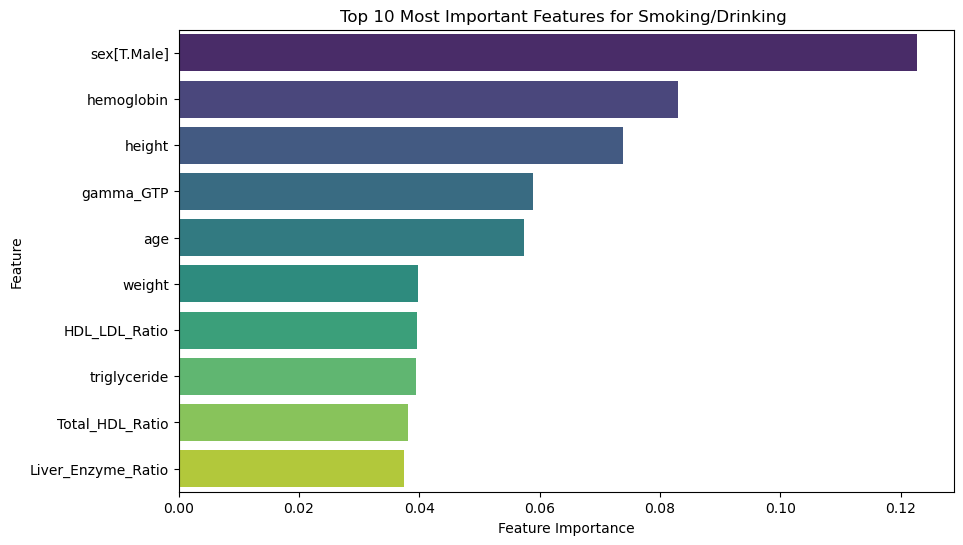

In [17]:
# smoking or drinking 
sample_df_DS = sample_df.copy()
sample_df_DS['DorS'] = sample_df_DS.apply(lambda row: 1 if row['Smoking_Status'] == 1 or row['Drinking_Status'] == '1' else 0, axis=1)
sample_df_DS= sample_df_DS.drop(columns=['DRK_YN', 'SMK_stat_type_cd', 'Drinking_Status','Smoking_Status'])

formula_DS = 'DorS ~ sex + age + height + weight + waistline + sight_left + sight_right + hear_left + hear_right + SBP + DBP + BLDS + tot_chole + HDL_chole + LDL_chole + triglyceride + hemoglobin + urine_protein + serum_creatinine + SGOT_AST + SGOT_ALT + gamma_GTP + Hearing_State + HDL_LDL_Ratio+ BMI+ Total_HDL_Ratio+ Liver_Enzyme_Ratio'
y_ds, X_ds = dmatrices(formula_DS, data=sample_df_DS, return_type='dataframe')

# Drop the intercept column from X
X_ds = X_ds.drop('Intercept', axis=1)


# Step 4: Train-test split
X_ds_train, X_ds_test, y_ds_train, y_ds_test = train_test_split(X_ds, y_ds, test_size=0.3, random_state=1)

# Step 5: Perform cross-validation to find the best hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()
grid_search_ds = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search_ds.fit(X_ds_train, y_ds_train.values.ravel())

# Step 6: Train the final model using the best hyperparameters on the entire training set
best_knn_ds = grid_search_ds.best_estimator_
best_knn_ds.fit(X_ds_train, y_ds_train.values.ravel())

# Step 7: Evaluate the final model on the test set
test_accuracy_ds = best_knn_ds.score(X_ds_test, y_ds_test)
print(f'Test set accuracy: {test_accuracy_ds:.4f}')


# Train a Random Forest model
rf_fe_ds = RandomForestClassifier(random_state=1)
rf_fe_ds.fit(X_ds_train, y_ds_train.values.ravel())

# Get feature importances
importance_scores_ds = rf_fe_ds.feature_importances_

importance_df_ds = pd.DataFrame({
    'Feature': X_ds_test.columns,
    'Importance': importance_scores_ds
})

# Select top N features for visualization
top_n = 10
top_features_ds = importance_df_ds.nlargest(top_n, 'Importance')

# Plotting the most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_ds, palette='viridis')
plt.title(f'Top {top_n} Most Important Features for Smoking/Drinking ')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()



In [21]:
#sample_df_no_feature_engg.columns
sample_df_DS.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'Hearing_State', 'HDL_LDL_Ratio', 'BMI', 'Total_HDL_Ratio',
       'Liver_Enzyme_Ratio', 'liver_damage_score', 'DorS'],
      dtype='object')

In [23]:
#sample_df_no_feature_engg.columns
sample_df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN', 'Hearing_State',
       'HDL_LDL_Ratio', 'BMI', 'Total_HDL_Ratio', 'Liver_Enzyme_Ratio',
       'liver_damage_score', 'Smoking_Status', 'Drinking_Status'],
      dtype='object')